In [4]:
import pandas as pd
import numpy as np
from pandas_datareader import DataReader
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from scipy.stats import norm
from tabulate import tabulate

In [5]:
tickers = ['JNJ', 'TSLA', 'PG', 'XOM', 'ABBV']
prices_df = DataReader(tickers, 'yahoo', start='2017-01-01', end='2022-10-17')['Adj Close']
print(prices_df.head())

Symbols            JNJ       TSLA         PG        XOM       ABBV
Date                                                              
2017-01-03   99.562416  14.466000  71.760170  67.864052  47.737011
2017-01-04   99.399086  15.132667  72.015862  67.117393  48.410122
2017-01-05  100.439079  15.116667  72.493118  66.116852  48.777264
2017-01-06   99.957756  15.267333  72.467537  66.079529  48.792561
2017-01-09   99.940575  15.418667  71.930618  64.989403  49.113819


In [6]:
stocks_weights = [0.2711, 0.0530, 0.2504, 0.2013, 0.2242]
print(sum(stocks_weights))

1.0


In [7]:
returns_df = prices_df.pct_change()[1:]
print(returns_df.head())

Symbols          JNJ      TSLA        PG       XOM      ABBV
Date                                                        
2017-01-04 -0.001640  0.046085  0.003563 -0.011002  0.014100
2017-01-05  0.010463 -0.001057  0.006627 -0.014907  0.007584
2017-01-06 -0.004792  0.009967 -0.000353 -0.000565  0.000314
2017-01-09 -0.000172  0.009912 -0.007409 -0.016497  0.006584
2017-01-10 -0.001032 -0.006096 -0.010782 -0.012753 -0.002180


In [8]:
weighted_returns = stocks_weights * returns_df
print(weighted_returns.head())

Symbols          JNJ      TSLA        PG       XOM      ABBV
Date                                                        
2017-01-04 -0.000445  0.002443  0.000892 -0.002215  0.003161
2017-01-05  0.002836 -0.000056  0.001659 -0.003001  0.001700
2017-01-06 -0.001299  0.000528 -0.000088 -0.000114  0.000070
2017-01-09 -0.000047  0.000525 -0.001855 -0.003321  0.001476
2017-01-10 -0.000280 -0.000323 -0.002700 -0.002567 -0.000489


In [9]:
portfolio_returns = weighted_returns.sum(axis=1)
print(portfolio_returns.head())

Date
2017-01-04    0.003837
2017-01-05    0.003139
2017-01-06   -0.000903
2017-01-09   -0.003221
2017-01-10   -0.006359
dtype: float64


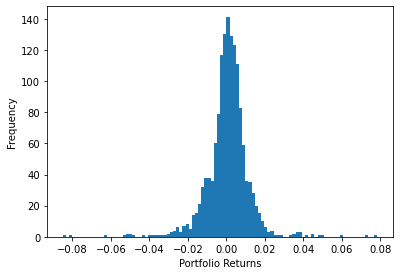

In [20]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.hist(portfolio_returns, bins=100)
ax1.set_xlabel('Portfolio Returns')
ax1.set_ylabel('Frequency')
plt.show()

In [15]:
mean = np.mean(portfolio_returns)
std = np.std(portfolio_returns)

In [16]:
VaR_90 = norm.ppf(1-0.9, mean, std)
VaR_95 = norm.ppf(1-0.95, mean, std)
VaR_99 = norm.ppf(1-0.99, mean, std)
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0136648
95%                      -0.0177293
99%                      -0.0253535


In [17]:
VaR_99 * 1000000

-25353.537090562462

# Conditional VaR

In [18]:
tail_loss_90 = norm.expect(lambda x: x, loc = mean, scale = std, lb = VaR_90)
CVaR_90 = (1 / (1 - 0.90)) * tail_loss_90

tail_loss_95 = norm.expect(lambda x: x, loc = mean, scale = std, lb = VaR_95)
CVaR_95 = (1 / (1 - 0.95)) * tail_loss_95

tail_loss_99 = norm.expect(lambda x: x, loc = mean, scale = std, lb = VaR_99)
CVaR_99 = (1 / (1 - 0.99)) * tail_loss_99

print(tabulate([['90%', CVaR_90], ['95%', CVaR_95], ['99%', CVaR_99]], headers=['Confidence Level', 'Conditional Value at Risk']))

Confidence Level      Conditional Value at Risk
------------------  ---------------------------
90%                                   0.0256874
95%                                   0.0358561
99%                                   0.0964045


In [45]:
CVaR_99 * 1000000

96404.47839134223

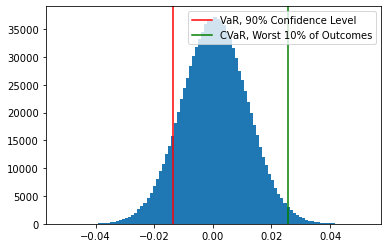

In [41]:
plt.hist(norm.rvs(size = 1000000, loc = mean, scale = std), bins = 100)
plt.axvline(x = VaR_90, c = 'r', label = 'VaR, 90% Confidence Level')
plt.axvline(x = CVaR_90, c = 'g', label = 'CVaR, Worst 10% of Outcomes')
plt.legend()
plt.show()

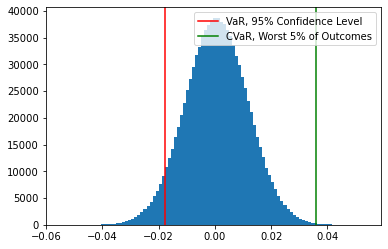

In [42]:
plt.hist(norm.rvs(size = 1000000, loc = mean, scale = std), bins = 100)
plt.axvline(x = VaR_95, c = 'r', label = 'VaR, 95% Confidence Level')
plt.axvline(x = CVaR_95, c = 'g', label = 'CVaR, Worst 5% of Outcomes')
plt.legend()
plt.show()

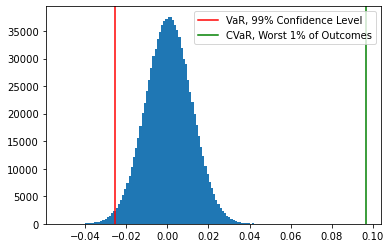

In [43]:
plt.hist(norm.rvs(size = 1000000, loc = mean, scale = std), bins = 100)
plt.axvline(x = VaR_99, c = 'r', label = 'VaR, 99% Confidence Level')
plt.axvline(x = CVaR_99, c = 'g', label = 'CVaR, Worst 1% of Outcomes')
plt.legend()
plt.show()

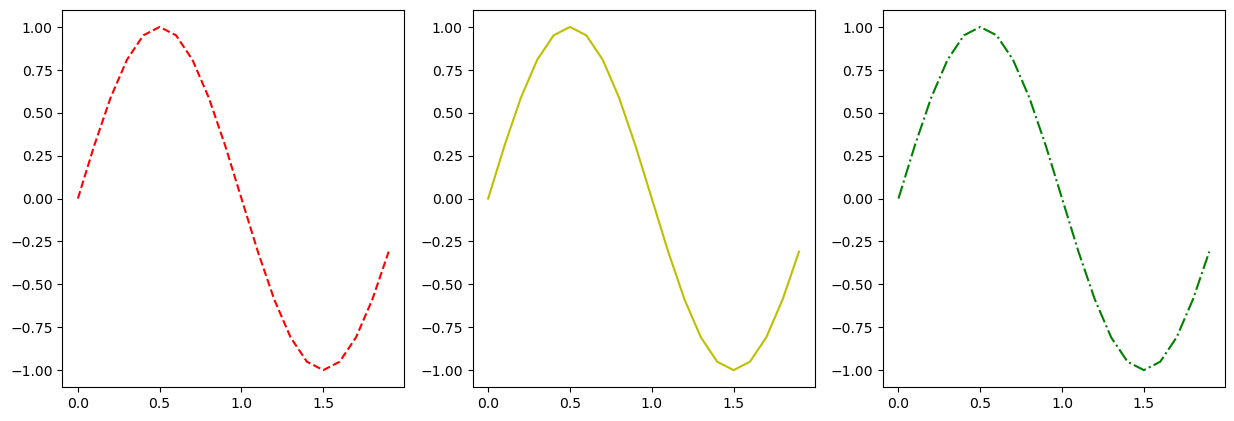

In [44]:
t=np.arange(0.0,2.0,0.1)
s=np.sin(t*np.pi)

plt.figure(figsize=(15,5), dpi=100)
plt.figure(1)
ax1 = plt.subplot(131)
ax1.plot(t,s, color="r",linestyle = "--")
ax2 = plt.subplot(132)
ax2.plot(t,s,color="y",linestyle = "-")
ax3 = plt.subplot(133)
ax3.plot(t,s,color="g",linestyle = "-.")